<a href="https://colab.research.google.com/github/SiLiKhon/HEPStatsSeminar/blob/Artem-Seminar2-tests/seminar2/LinearModels_LHCb_PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sample management

In [0]:
!wget https://github.com/hse-aml/hadron-collider-machine-learning/releases/download/Week_2/training.csv.gz

In [0]:
!gunzip training.csv.gz

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data = pd.read_csv('training.csv')

In [3]:
len(data)

1200000

## Feature description
Here, Spd stands for Scintillating Pad Detector, Prs - Preshower, Ecal - electromagnetic calorimeter, Hcal - hadronic calorimeter, Brem denotes traces of the particles that were deflected by detector

Features:

* ID - id value for tracks (presents only in the test file for the submitting purposes)
* Label - string valued observable denoting particle types. Can take values "Electron", "Muon", "Kaon", "Proton", "Pion" and "Ghost". This column is absent in the test file.
* FlagSpd - flag (0 or 1), if reconstructed track passes through Spd
* FlagPrs - flag (0 or 1), if reconstructed track passes through Prs
* FlagBrem - flag (0 or 1), if reconstructed track passes through Brem
* FlagEcal - flag (0 or 1), if reconstructed track passes through Ecal
* FlagHcal - flag (0 or 1), if reconstructed track passes through Hcal
* FlagRICH1 - flag (0 or 1), if reconstructed track passes through the first RICH detector
* FlagRICH2 - flag (0 or 1), if reconstructed track passes through the second RICH detector
* FlagMuon - flag (0 or 1), if reconstructed track passes through muon stations (Muon)
* SpdE - energy deposit associated to the track in the Spd
* PrsE - energy deposit associated to the track in the Prs
* EcalE - energy deposit associated to the track in the Hcal
* HcalE - energy deposit associated to the track in the Hcal
* PrsDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Prs
* BremDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Brem
* TrackP - particle momentum
* TrackPt - particle transverse momentum
* TrackNDoFSubdetector1 - number of degrees of freedom for track fit using hits in the tracking sub-detector1
* TrackQualitySubdetector1 - chi2 quality of the track fit using hits in the tracking sub-detector1
* TrackNDoFSubdetector2 - number of degrees of freedom for track fit using hits in the tracking sub-detector2
* TrackQualitySubdetector2 - chi2 quality of the track fit using hits in the tracking sub-detector2
* TrackNDoF - number of degrees of freedom for track fit using hits in all tracking sub-detectors
* TrackQualityPerNDoF - chi2 quality of the track fit per degree of freedom
* TrackDistanceToZ - distance between track and z-axis (beam axis)
* Calo2dFitQuality - quality of the 2d fit of the clusters in the calorimeter
* Calo3dFitQuality - quality of the 3d fit in the calorimeter with assumption that particle was electron
* EcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Ecal
* EcalDLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from Ecal
* EcalShowerLongitudinalParameter - longitudinal parameter of Ecal shower
* HcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Hcal
* HcalDLLbeMuon - delta log-likelihood for a particle candidate to be using information from Hcal
* RICHpFlagElectron - flag (0 or 1) if momentum is greater than threshold for electrons to produce Cherenkov light
* RICHpFlagProton - flag (0 or 1) if momentum is greater than threshold for protons to produce Cherenkov light
* RICHpFlagPion - flag (0 or 1) if momentum is greater than threshold for pions to produce Cherenkov light
* RICHpFlagKaon - flag (0 or 1) if momentum is greater than threshold for kaons to produce Cherenkov light
* RICHpFlagMuon - flag (0 or 1) if momentum is greater than threshold for muons to produce Cherenkov light
* RICH_DLLbeBCK - delta log-likelihood for a particle candidate to be background using information from RICH
* RICH_DLLbeKaon - delta log-likelihood for a particle candidate to be kaon using information from RICH
* RICH_DLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from RICH
* RICH_DLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from RICH
* RICH_DLLbeProton - delta log-likelihood for a particle candidate to be proton using information from RICH
* MuonFlag - muon flag (is this track muon) which is determined from muon stations
* MuonLooseFlag muon flag (is this track muon) which is determined from muon stations using looser criteria
* MuonLLbeBCK - log-likelihood for a particle candidate to be not muon using information from muon stations
* MuonLLbeMuon - log-likelihood for a particle candidate to be muon using information from muon stations
* DLLelectron - delta log-likelihood for a particle candidate to be electron using information from all subdetectors
* DLLmuon - delta log-likelihood for a particle candidate to be muon using information from all subdetectors
* DLLkaon - delta log-likelihood for a particle candidate to be kaon using information from all subdetectors
* DLLproton - delta log-likelihood for a particle candidate to be proton using information from all subdetectors
* GhostProbability - probability for a particle candidate to be ghost track. This variable is an output of classification model used in the tracking algorithm.

Delta log-likelihood in the features descriptions means the difference between log-likelihood for the mass hypothesis that a given track is left by some particle (for example, electron) and log-likelihood for the mass hypothesis that a given track is left by a pion (so, DLLpion = 0 and thus we don't have these columns). This is done since most tracks (~80%) are left by pions and in practice we actually need to discriminate other particles from pions. In other words, the null hypothesis is that particle is a pion.


# Feature selection and preprocessing

In [4]:
data.columns

Index(['TrackP', 'TrackNDoFSubdetector2', 'BremDLLbeElectron', 'MuonLooseFlag',
       'FlagSpd', 'SpdE', 'EcalDLLbeElectron', 'DLLmuon', 'RICHpFlagElectron',
       'EcalDLLbeMuon', 'TrackQualitySubdetector2', 'FlagPrs', 'DLLelectron',
       'DLLkaon', 'EcalE', 'TrackQualityPerNDoF', 'DLLproton',
       'PrsDLLbeElectron', 'FlagRICH1', 'MuonLLbeBCK', 'FlagHcal',
       'EcalShowerLongitudinalParameter', 'Calo2dFitQuality', 'TrackPt',
       'TrackDistanceToZ', 'RICHpFlagPion', 'HcalDLLbeElectron',
       'Calo3dFitQuality', 'FlagEcal', 'MuonLLbeMuon', 'TrackNDoFSubdetector1',
       'RICHpFlagProton', 'RICHpFlagKaon', 'GhostProbability',
       'TrackQualitySubdetector1', 'Label', 'RICH_DLLbeBCK', 'FlagRICH2',
       'FlagBrem', 'HcalDLLbeMuon', 'TrackNDoF', 'RICHpFlagMuon',
       'RICH_DLLbeKaon', 'RICH_DLLbeElectron', 'HcalE', 'MuonFlag', 'FlagMuon',
       'PrsE', 'RICH_DLLbeMuon', 'RICH_DLLbeProton'],
      dtype='object')

Let's consider PID between two particle types for simplicity:

In [5]:
data = data[(data.Label == 'Kaon') | (data.Label == 'Pion')].copy()

features = [col for col in data.columns if col != 'Label']
data['Label'] = (data.Label == 'Kaon').astype(float)

print(len(data))

400000


In [0]:
from sklearn import linear_model, metrics, model_selection, preprocessing
train, test = model_selection.train_test_split(data, test_size=0.25)

Selecting the best features is quite an important and non-trivial part of building machine learning models. Scikit-learn has a number of ways to automate this process - to be used with caution - see [this page](https://scikit-learn.org/stable/modules/feature_selection.html) for more details.

At this point we are not going to use these tools, but rather do a really simple thing: will score each feature with `roc_auc_score` to find those giving maximum separation between classes.

In [0]:
# Build an array of scores of form [(feature1, score1), (feature2, score2), ...]
scores = [(f, metrics.roc_auc_score(data.Label, data[f])) for f in features]

# Sort this array by the scores in descending order.
# As AUC is symmetric with respect to 0.5, we'll sort
# by max(score, 1-score):
scores = (sorted(scores, key=lambda x: -max(x[1], 1-x[1])))

In [51]:
# Print top 10:
for f, score in scores[:10]:
  print("{} : {}".format(f, score))

DLLkaon : 0.940750676175
RICH_DLLbeKaon : 0.9352258900875
DLLproton : 0.89480377495
RICH_DLLbeBCK : 0.8940402752375001
RICH_DLLbeProton : 0.8918642772875
RICH_DLLbeElectron : 0.7534392077625
RICH_DLLbeMuon : 0.6700616067125
TrackPt : 0.6488308649000001
DLLmuon : 0.6249113967875
TrackP : 0.6175779303375001


So, just a single `DLLkaon` feature gives us an AUC of 94%!
Let's see if we can beat this score.

The simplest thing we can do is to take, say, 10 best features and feed them into a logistic regression model:

In [59]:
top10_features = list(list(zip(*scores))[0][:10])

def get_features(dataset):
  return dataset[top10_features]

model = linear_model.LogisticRegression()

model.fit(get_features(train), train.Label)

preds_train = model.predict_proba(get_features(train))[:,1]
preds_test  = model.predict_proba(get_features(test ))[:,1]

print(metrics.roc_auc_score(train.Label, preds_train))
print(metrics.roc_auc_score(test .Label, preds_test ))

0.9305446882767139
0.9300369517834517


Hmm, that just decreased the score.

Let's look at the range of these features:

In [61]:
for f in top10_features:
  print("{:20s} : ({:10.2f}, {:10.2f})".format(f, data[f].min(), data[f].max()))

DLLkaon              : (   -999.00,     168.17)
RICH_DLLbeKaon       : (   -999.00,     158.80)
DLLproton            : (   -999.00,     123.64)
RICH_DLLbeBCK        : (   -999.00,      67.68)
RICH_DLLbeProton     : (   -999.00,     127.74)
RICH_DLLbeElectron   : (   -999.00,     117.59)
RICH_DLLbeMuon       : (   -999.00,      89.58)
TrackPt              : (      4.51,  427157.03)
DLLmuon              : (   -999.00,      14.41)
TrackP               : (   1140.57, 2289635.75)


We can notice two things:
1.   ranges are very different
2.   some variables have 'unnatural' minimum of -999

Let's discuss problem 1 first. Our model treats its inputs as vectors of $R^M$ space ($M$ is the number of features), and calculates things like dot-product ${\bf W}\cdot{\bf x}$. This assumes that all the components of these vectors are objects of the same nature and have the same units. Obviously this is not the case. We can however emulate this by scaling the components of these vectors to have same variance and mean:



In [62]:
def get_features(dataset):
  return dataset[top10_features]

scaler = preprocessing.RobustScaler()
scaler.fit(get_features(train))

model = linear_model.LogisticRegression()

model.fit(scaler.transform(get_features(train)), train.Label)

preds_train = model.predict_proba(scaler.transform(get_features(train)))[:,1]
preds_test  = model.predict_proba(scaler.transform(get_features(test )))[:,1]

print(metrics.roc_auc_score(train.Label, preds_train))
print(metrics.roc_auc_score(test .Label, preds_test ))

0.9324556268390238
0.9318817727521804


This increased the score slightly.

Now, problem 2. Let's have a look at one of these features with -999 minimum:

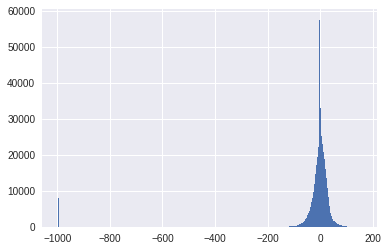

In [64]:
plt.hist(data.RICH_DLLbeKaon, bins=300);

Note the standalone peak near -1000 (actually, -999). Looks like some discreet value was used to denote the cases when `RICH_DLLbeKaon` could not be calculated.

The simplest thing we can do with it is to just replace -999 by the mean of the feature, but since in such a way we'll lose this information, let's encode it into a new feature:

In [0]:
def convert_outlier(column, value=-999):
  """
  Function takes a single pandas column and returns a dataframe
  with two columns: same column with all occurrences of `value`
  replaced by mean and a binary `column == value` column
  """
  is_out = (column == value)
  is_out.name += '_out'
  
  mean = column[~is_out].mean()
  column = column.copy()
  column[is_out] = mean
  
  return pd.concat([column, is_out.astype(float)], axis=1)

In [67]:
outlier_columns = [f for f in top10_features if (data[f] == -999).sum() > 0]
print(outlier_columns)

['DLLkaon', 'RICH_DLLbeKaon', 'DLLproton', 'RICH_DLLbeBCK', 'RICH_DLLbeProton', 'RICH_DLLbeElectron', 'RICH_DLLbeMuon', 'DLLmuon']


In [68]:
def get_features(dataset):
  return pd.concat([convert_outlier(dataset[f]) if f in outlier_columns else
                    dataset[f] for f in top10_features], axis=1)

get_features(train).head()

,DLLkaon,DLLkaon_out,RICH_DLLbeKaon,RICH_DLLbeKaon_out,DLLproton,DLLproton_out,RICH_DLLbeBCK,RICH_DLLbeBCK_out,RICH_DLLbeProton,RICH_DLLbeProton_out,RICH_DLLbeElectron,RICH_DLLbeElectron_out,RICH_DLLbeMuon,RICH_DLLbeMuon_out,TrackPt,DLLmuon,DLLmuon_out,TrackP
315982,0.000004,0.0,0.435491,0.0,0.000004,0.0,-0.000009,0.0,-0.000009,0.0,-8.255909,0.0,-0.481909,0.0,123.829801,-0.226171,0.0,2373.399900
399581,4.295512,0.0,2.975100,0.0,2.832513,0.0,3.317000,0.0,2.118400,0.0,-1.468700,0.0,1.631900,0.0,174.420365,-0.282913,0.0,11474.059587
341239,-5.969101,0.0,-6.774915,0.0,-7.408401,0.0,-5.384615,0.0,-5.056515,0.0,-18.645315,0.0,-18.700214,0.0,523.539009,-10.441173,0.0,4981.470223
1096464,1.740584,0.0,2.679505,0.0,2.374084,0.0,3.249905,0.0,2.441905,0.0,0.100005,0.0,-2.859395,0.0,160.196005,-7.535274,0.0,12322.389655
944681,-36.512314,0.0,-34.370313,0.0,-37.242615,0.0,-31.222112,0.0,-38.529413,0.0,-33.086412,0.0,-11.654313,0.0,847.299065,-7.286496,0.0,6771.140130


In [69]:
scaler = preprocessing.RobustScaler()
scaler.fit(get_features(train))

model = linear_model.LogisticRegression()

model.fit(scaler.transform(get_features(train)), train.Label)

preds_train = model.predict_proba(scaler.transform(get_features(train)))[:,1]
preds_test  = model.predict_proba(scaler.transform(get_features(test )))[:,1]

print(metrics.roc_auc_score(train.Label, preds_train))
print(metrics.roc_auc_score(test .Label, preds_test ))


0.9486294706968528
0.9480903137209529


Huh! We've finally beaten the `DLLkaon` score.

Now let's use the k-fold cross validation technique to ensure this is indeed the case.

## 1. Univariate feature selection
Feature Extraction with Univariate Statistical Tests (Chi-squared for classification).

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing

In [0]:
ust_test = SelectKBest(k=5)

Prepare features. Transform ther to non-negative form.

In [0]:
data_pos = data[features] - data[features].min(axis=0)

In [50]:
ust_test.fit(data[features], data.Label)

SelectKBest(k=5, score_func=<function f_classif at 0x7f3bc71dab70>)

In [51]:
best_features = np.array(features)[ust_test.get_support(indices=True)].tolist()
print(best_features)

['TrackP', 'DLLkaon', 'DLLproton', 'RICHpFlagKaon', 'RICH_DLLbeKaon']


### Summarize scores

In [0]:
np.set_printoptions(precision=3)
print(fit.scores_)
ust_features = fit.transform(data.loc[:, data.columns != 'Label'])

## 2. Recursive feature elimination
Feature ranking with recursive feature elimination.

Let's take just 1% of our sample. Because we will compute a lot during the next step.

In [11]:
from sklearn.model_selection import train_test_split
fs_train, fs_test = train_test_split(data, test_size=0.01) # fs means feature selection
len(fs_test)

4000

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

fs_model = LogisticRegression()
rfe = RFE(fs_model, 5)

In [13]:
%%time
selector = rfe.fit(fs_test.loc[:, fs_test.columns != 'Label'], fs_test.Label)

CPU times: user 13.3 s, sys: 8.79 ms, total: 13.3 s
Wall time: 13.3 s


Let's summarise scores:

In [14]:
best_features = fs_test.columns[selector.get_support(indices=True)].tolist()
print("Number of Features: ", selector.n_features_)
print("Selected Features: ", best_features)
# print("Feature Ranking: ", selector.ranking_)

Number of Features:  5
Selected Features:  ['RICHpFlagElectron', 'FlagRICH1', 'TrackDistanceToZ', 'RICHpFlagPion', 'RICHpFlagKaon']


# Classifier: Logistic regression

In [0]:
from sklearn import linear_model, metrics, model_selection, preprocessing

In [0]:
train, test = model_selection.train_test_split(data, test_size=0.25)

In [65]:
def get_features(dataset):
  return dataset[[f for f in best_features if f != 'RICHpFlagKaon' and f != 'DLLproton' and f != 'DLLkaon']]

get_features(train).head()

,TrackP,RICH_DLLbeKaon
76666,11228.459957,-65.655899
789108,10034.530284,11.896203
562190,4557.419924,-17.789306
820157,41851.089847,4.662197
414798,100630.906249,0.791515


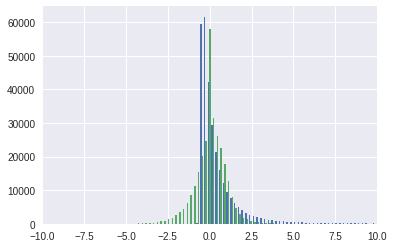

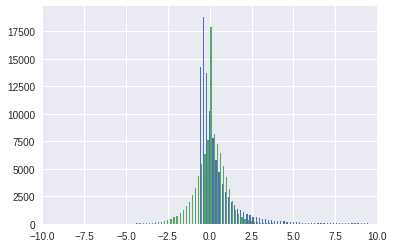

In [71]:
plt.hist(scaler.transform(get_features(train)), bins=1000);
plt.xlim(-10, 10);
plt.show();

plt.hist(scaler.transform(get_features(test )), bins=1000);
plt.xlim(-10, 10);
plt.show();

In [66]:
#def get_features(dataset):
#  return dataset[features]


scaler = preprocessing.RobustScaler()
scaler.fit(get_features(train))

model = linear_model.LogisticRegression()

model.fit(scaler.transform(get_features(train)), train.Label)

preds_train = model.predict_proba(scaler.transform(get_features(train)))[:,1]
preds_test  = model.predict_proba(scaler.transform(get_features(test )))[:,1]

print(metrics.roc_auc_score(train.Label, preds_train))
print(metrics.roc_auc_score(test .Label, preds_test ))


0.7776568647364821
0.7790582630783802


In [21]:
metrics.roc_auc_score(test.Label, test.RICH_DLLbeKaon)

0.9356737441638848

# k-fold cross-validation